In [70]:
import numpy as np
import pandas as pd
import config1

In [71]:
# Data Gathering

df=pd.read_csv(config1.CSV_PATH)
df

,Unnamed: 0,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,0,6.6,35,Good,Bad,High,Low,254,high
1,1,6.6,36,Bad,Good,Low,High,253,high
2,2,8.5,70,Good,Good,High,High,246,low
3,3,9.5,34,Good,Good,Low,High,255,low
4,4,6.6,37,Bad,Bad,Low,Low,255,medium
...,...,...,...,...,...,...,...,...,...
1054,1054,6.7,45,Good,Good,Low,Low,247,medium
1055,1055,6.7,38,Good,Bad,High,Low,255,high
1056,1056,3.0,40,Good,Good,High,High,255,low
1057,1057,6.8,43,Good,Bad,High,Low,250,high


In [72]:
df=df.drop('Unnamed: 0',axis=1)

In [73]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,High,Low,254,high
1,6.6,36,Bad,Good,Low,High,253,high
2,8.5,70,Good,Good,High,High,246,low
3,9.5,34,Good,Good,Low,High,255,low
4,6.6,37,Bad,Bad,Low,Low,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,Good,Good,Low,Low,247,medium
1055,6.7,38,Good,Bad,High,Low,255,high
1056,3.0,40,Good,Good,High,High,255,low
1057,6.8,43,Good,Bad,High,Low,250,high


In [38]:
# EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   object 
 3   Odor        1059 non-null   object 
 4   Fat         1059 non-null   object 
 5   Turbidity   1059 non-null   object 
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 66.3+ KB


In [74]:
df['Taste'].replace({'Good':1,'Bad':0},inplace=True)
df['Odor'].replace({'Good':1,'Bad':0},inplace=True)
df['Fat '].replace({'High':1,'Low':0},inplace=True)
df['Turbidity'].replace({'High':1,'Low':0},inplace=True)

In [75]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


<AxesSubplot: ylabel='Density'>

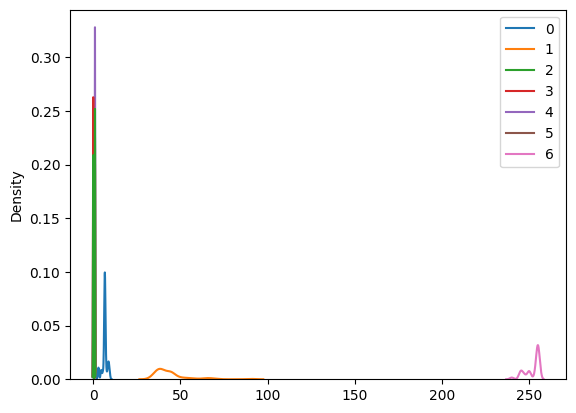

In [76]:
# scaling
import seaborn as sns
from scipy.stats import skew

sns.kdeplot(df.to_numpy())    # no normally distribution used normalization

<AxesSubplot: xlabel='pH'>

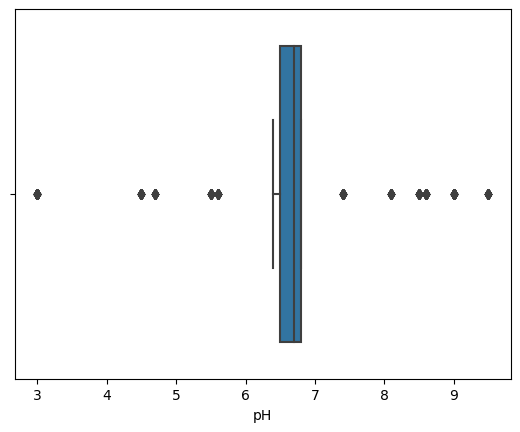

In [80]:
# checking outliers

sns.boxplot(x=df['pH'])

upper tail 7.25
lower tail 6.050000000000001


<AxesSubplot: xlabel='pH'>

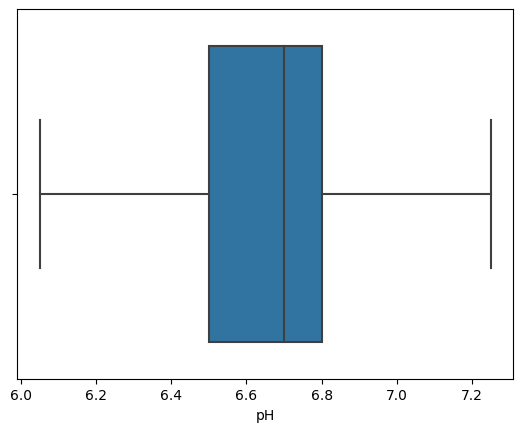

In [82]:
q1=df['pH'].quantile(0.25)
q3=df['pH'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper tail",upper_tail)
print("lower tail",lower_tail)
df['pH']=np.where(df['pH']>upper_tail,upper_tail,df['pH'])
df['pH']=np.where(df['pH']<lower_tail,lower_tail,df['pH'])
sns.boxplot(x=df['pH'])

<AxesSubplot: xlabel='Temprature'>

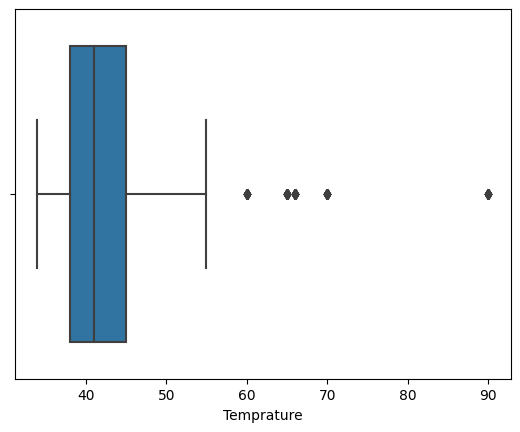

In [83]:
sns.boxplot(x=df['Temprature'])

upper tail 55.5
lower tail 27.5


<AxesSubplot: xlabel='Temprature'>

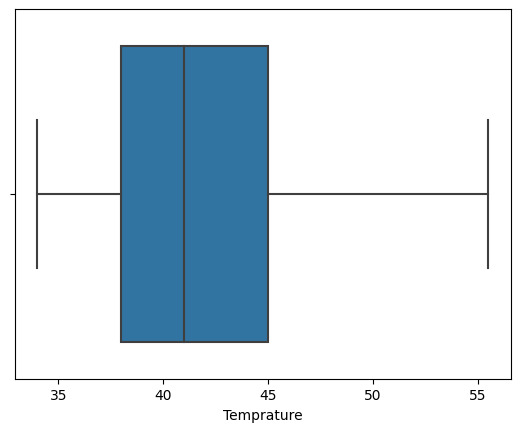

In [84]:
q1=df['Temprature'].quantile(0.25)
q3=df['Temprature'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper tail",upper_tail)
print("lower tail",lower_tail)
df['Temprature']=np.where(df['Temprature']>upper_tail,upper_tail,df['Temprature'])
df['Temprature']=np.where(df['Temprature']<lower_tail,lower_tail,df['Temprature'])
sns.boxplot(x=df['Temprature'])

<AxesSubplot: xlabel='Taste'>

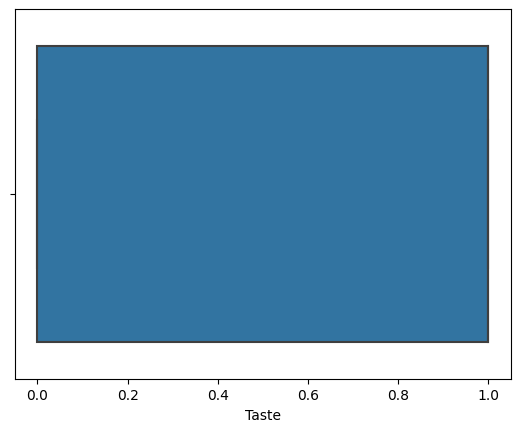

In [85]:
sns.boxplot(x=df['Taste'])

<AxesSubplot: xlabel='Odor'>

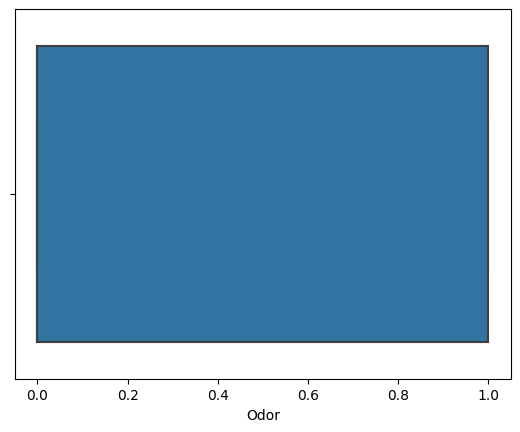

In [86]:
sns.boxplot(x=df['Odor'])

<AxesSubplot: xlabel='Fat '>

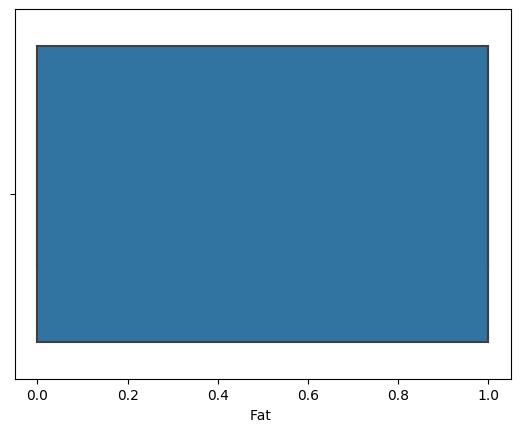

In [87]:
sns.boxplot(x=df['Fat '])

<AxesSubplot: xlabel='Turbidity'>

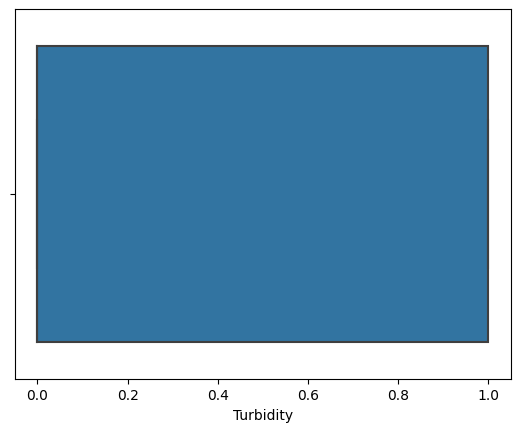

In [88]:
sns.boxplot(x=df['Turbidity'])

255

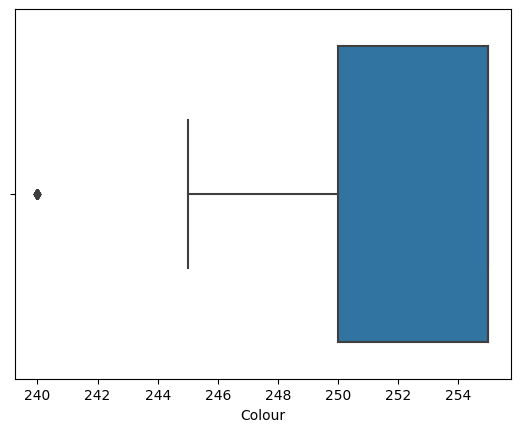

In [92]:
sns.boxplot(x=df['Colour'])

upper tail 262.5
lower tail 242.5


<AxesSubplot: xlabel='Colour'>

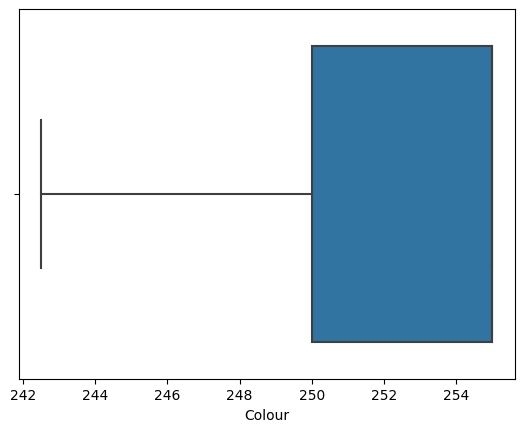

In [93]:
q1=df['Colour'].quantile(0.25)
q3=df['Colour'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper tail",upper_tail)
print("lower tail",lower_tail)
df['Colour']=np.where(df['Colour']>upper_tail,upper_tail,df['Colour'])
df['Colour']=np.where(df['Colour']<lower_tail,lower_tail,df['Colour'])
sns.boxplot(x=df['Colour'])

<AxesSubplot: >

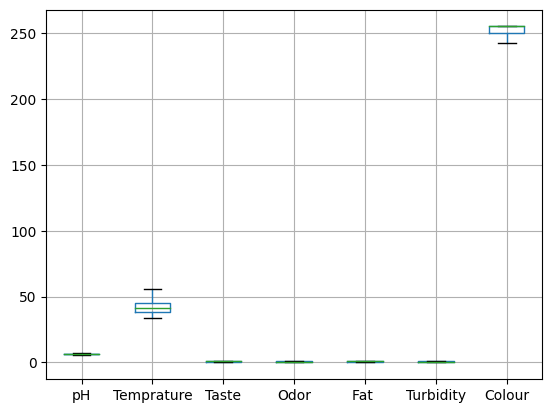

In [94]:
df.boxplot()

In [96]:
from sklearn.preprocessing import MinMaxScaler

x=df.drop("Grade",axis=1)
y=df['Grade']

normal_scaler=MinMaxScaler()
array=normal_scaler.fit_transform(x)
dfx=pd.DataFrame(array,columns=x.columns)

In [97]:
dfx

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,0.458333,0.046512,1.0,0.0,1.0,0.0,0.92
1,0.458333,0.093023,0.0,1.0,0.0,1.0,0.84
2,1.000000,1.000000,1.0,1.0,1.0,1.0,0.28
3,1.000000,0.000000,1.0,1.0,0.0,1.0,1.00
4,0.458333,0.139535,0.0,0.0,0.0,0.0,1.00
...,...,...,...,...,...,...,...
1054,0.541667,0.511628,1.0,1.0,0.0,0.0,0.36
1055,0.541667,0.186047,1.0,0.0,1.0,0.0,1.00
1056,0.000000,0.279070,1.0,1.0,1.0,1.0,1.00
1057,0.625000,0.418605,1.0,0.0,1.0,0.0,0.60


In [98]:
# model training

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(dfx,y,test_size=0.2,random_state=10,stratify=y)

log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [107]:
# model evaluation on training data

from sklearn.metrics import accuracy_score

y_pred_train=log_model.predict(x_train)

train_accuracy=accuracy_score(y_train,y_pred_train)
print("Train accuracy :",train_accuracy)

Train accuracy : 0.8004722550177096


In [109]:
# model evaluation of testing data

y_pred_test=log_model.predict(x_test)

test_accuracy=accuracy_score(y_test,y_pred_test)
print("Test accuracy :",test_accuracy)

Test accuracy : 0.8301886792452831


In [110]:
# model training by using knn

from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test=train_test_split(dfx,y,test_size=0.2,random_state=10,stratify=y)

knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [111]:
# model evaluation on training data

from sklearn.metrics import accuracy_score

y_pred_train=knn_model.predict(x_train)

train_accuracy=accuracy_score(y_train,y_pred_train)
print("Train accuracy by knn:",train_accuracy)

Train accuracy by knn: 0.9964580873671782


In [112]:
# model evaluation of testing data

y_pred_test=knn_model.predict(x_test)

test_accuracy=accuracy_score(y_test,y_pred_test)
print("Test accuracy by knn :",test_accuracy)

Test accuracy by knn : 0.9905660377358491


In [117]:
# save model
import pickle as pkl
import config2

with open(config2.MODEL_FILE_PATH,'wb') as f:
    pkl.dump(knn_model,f)

In [119]:
# save scaler
import config3

with open(config3.SCALER_PATH,'wb') as f:
    pkl.dump(normal_scaler,f)

In [124]:
# save column_name

import json

columns = x.columns
column_names = {"Column Names" : columns.tolist(),
               "Taste":{'Good': 1, 'Bad': 0},
               "Odor" :{'Bad': 0, 'Good': 1},
               "Fat " : {'High':1,'Low':0},
               "Turbidity" :{'High':1,'Low':0}}

with open(config3.JSON_FILE_PATH,'w') as f:
    json.dump(column_names, f)

In [122]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.60,35.0,1,0,1,0,254.0,high
1,6.60,36.0,0,1,0,1,253.0,high
2,7.25,55.5,1,1,1,1,246.0,low
3,7.25,34.0,1,1,0,1,255.0,low
4,6.60,37.0,0,0,0,0,255.0,medium
...,...,...,...,...,...,...,...,...
1054,6.70,45.0,1,1,0,0,247.0,medium
1055,6.70,38.0,1,0,1,0,255.0,high
1056,6.05,40.0,1,1,1,1,255.0,low
1057,6.80,43.0,1,0,1,0,250.0,high
